In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as mp
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Activation,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model= tf.keras.models.Sequential()
model.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.1,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('ImageClassifier/training_set',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('ImageClassifier/test_set',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 2814 images belonging to 2 classes.
Found 1106 images belonging to 2 classes.


In [6]:

model.fit_generator( training_set,steps_per_epoch=2000 // 32,epochs=30,validation_data=test_set,validation_steps=800 // 32)

Epoch 1/30
62/62 [==============================] - 30s 481ms/step - loss: 0.1502 - acc: 0.9389 - val_loss: 0.7431 - val_acc: 0.7638
Epoch 2/30
62/62 [==============================] - 29s 470ms/step - loss: 0.1558 - acc: 0.9350 - val_loss: 0.8610 - val_acc: 0.7712
Epoch 3/30
62/62 [==============================] - 30s 484ms/step - loss: 0.1689 - acc: 0.9335 - val_loss: 0.9268 - val_acc: 0.7400
Epoch 4/30
62/62 [==============================] - 29s 471ms/step - loss: 0.1524 - acc: 0.9390 - val_loss: 0.9133 - val_acc: 0.7400
Epoch 5/30
62/62 [==============================] - 29s 476ms/step - loss: 0.1494 - acc: 0.9420 - val_loss: 0.9212 - val_acc: 0.7538
Epoch 6/30
62/62 [==============================] - 29s 470ms/step - loss: 0.1464 - acc: 0.9440 - val_loss: 0.7469 - val_acc: 0.7950
Epoch 7/30
62/62 [==============================] - 29s 472ms/step - loss: 0.1400 - acc: 0.9474 - val_loss: 0.8886 - val_acc: 0.7438
Epoch 8/30
62/62 [==============================] - 30s 477ms/step - 

Dog


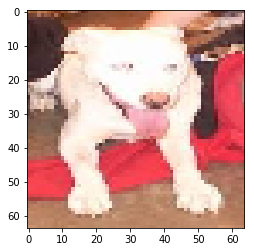

In [7]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('random.jpg',target_size=(64,64))
mp.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
training_set.class_indices

if result[0][0]>=0.5:
    print('Dog')
else :
    print('Cat')
    

In [8]:
model.save('ImageClassifierModel.model')